In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set


<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

(20000,)

array([2.99679119])

6.817231622231733

'RMSE =19.93816682288631'

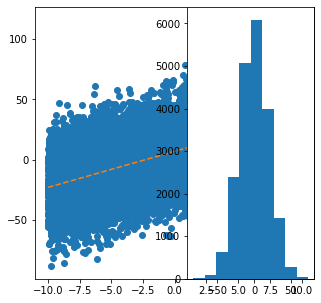

In [35]:
np.random.seed(8000)
x =np.linspace(-10,10,20000)
y = 3*x +  7 + np.random.normal(scale=20,size=x.shape)
f = plt.figure(figsize=(5,5))
ax = f.add_subplot (111)
ax.plot(x,y,"o")

lr=LinearRegression()
display(x.shape)
X = x.reshape(-1,1)
fit = lr.fit(X,y)

display(fit.coef_)
display(fit.intercept_)

y_pred = fit.predict(X)

error=y_pred-y


ax2 = f.add_subplot(122)
ax2.hist(error)

sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x))
display("RMSE ="+ str(rmse))

ax.plot(x,y_pred, "--")




array([2.90708467, 5.6336905 ])

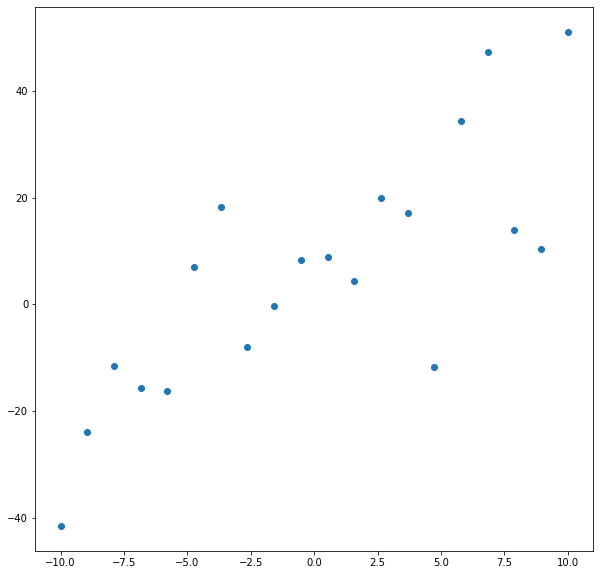

In [36]:
%reset -f
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set

np.random.seed(8000)
x =np.linspace(-10,10,20)
y = 3*x +  7 + np.random.normal(scale=20,size=x.shape)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot (111)
ax.plot(x,y,"o")


def loss_function(w,x,y):
    y_pred = w[0]*x + w[1]
    error = np.sum((y_pred-y)**2)
    return error

w=optimize.minimize(loss_function,[0,0],args=(x,y))
w.x


In [3]:
#bew try
np.random.seed(8000)
x1 =np.random.uniform(-10,10,(20))
x2 =np.random.uniform(-10,10,(20))

display(x1)
display(x2)
y = 3*x1 + 8*x2 + 7 + np.random.normal(scale=20,size=x1.shape)



data = pd.DataFrame({"y":y,"x1":x1,"x2":x2})
data



array([ 7.15339776,  8.85253665, -1.66568199, -7.82692464, -3.59386935,
        9.12361453,  7.98873825, -3.24329112, -2.14627871,  6.7503409 ,
       -5.04889396,  9.40127761,  7.44602171, -6.54202079, -9.65758023,
        0.48571238, -5.14375697, -8.59663995, -7.04071105,  9.00695016])

array([-1.74567404,  9.68621986,  1.38544839, -4.56854498, -4.24559599,
        5.02408325,  3.22150571, -5.38788341, -0.81003886, -9.56767984,
        5.09842705,  3.59382107, -8.05744708, -2.72800435, -7.93727023,
       -5.64247544,  7.15783981, -0.76000547, -2.85153407, -3.46496916])

,y,x1,x2
0,17.191213,7.153398,-1.745674
1,107.554610,8.852537,9.686220
2,8.064995,-1.665682,1.385448
3,-21.160018,-7.826925,-4.568545
4,-13.058789,-3.593869,-4.245596
5,87.856840,9.123615,5.024083
6,27.667415,7.988738,3.221506
7,-67.477237,-3.243291,-5.387883
8,-37.491999,-2.146279,-0.810039
9,-81.238325,6.750341,-9.567680


array([[17,  2],
       [ 2, 29]])

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.94      0.94      0.94        31

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



'[[1.12991186]], [2.76728775]'

,x,y,y_pred
17,-3.061224,1,0
18,-2.653061,1,0
19,-2.244898,0,1
21,-1.428571,0,1


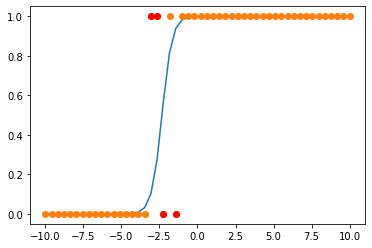

In [39]:
%reset -f
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
np.random.seed(8000)
def convert_to_class(x):
    if(np.random.uniform() > x):return 0
    return 1
x = np.linspace(-10,10,50)
y = 1/(1+np.exp(-(3*x+7)))
y2=[convert_to_class(z) for z in y]
plt.plot(x,y,'-')
plt.plot(x,y2,"o")

data = pd. DataFrame({"x":x,"y":y2})
target_columns="y"
X=data.drop(columns=target_columns)
y =data[target_columns]

log_reg = LogisticRegression(solver="lbfgs")
fit = log_reg.fit(X,y)
y_pred= log_reg.predict(X)

data= data.assign(y_pred=y_pred)

display(confusion_matrix(y,y_pred))

print(classification_report(y,y_pred))
display(f"{fit.coef_}, {fit.intercept_}");
incorrect = data [y_pred !=y]
plt.plot(incorrect.x,incorrect.y,"ro")
display(incorrect)

